In [1]:
import pandas as pd
import datetime
import numpy as np
import scipy.stats as stats
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style


start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 1, 11)

df = web.DataReader("ANTM.JK", 'yahoo', start, end)
print(df)
df.tail

harga = df['Adj Close']
mavg = harga.rolling(window=100).mean()
mpl.rc('figure', figsize=(8, 7))
mpl.__version__
style.use('ggplot')
harga.plot(label='ANTM')
mavg.plot(label='mavg')
plt.legend()

                  High         Low        Open       Close       Volume  \
Date                                                                      
2015-01-02  894.575012  869.375977  894.575012  877.776001    5997189.0   
2015-01-05  881.976013  865.176025  873.575989  873.575989    9622884.0   
2015-01-06  873.575989  852.575989  865.176025  860.976013   11705560.0   
2015-01-07  881.976013  860.976013  860.976013  873.575989   14333014.0   
2015-01-08  953.374023  890.375000  890.375000  936.573975   87242404.0   
...                ...         ...         ...         ...          ...   
2020-01-06  890.000000  855.000000  860.000000  885.000000  153322300.0   
2020-01-07  895.000000  865.000000  885.000000  875.000000   93750600.0   
2020-01-08  920.000000  890.000000  895.000000  905.000000  217122000.0   
2020-01-09  900.000000  875.000000  895.000000  880.000000  109423800.0   
2020-01-10  885.000000  865.000000  880.000000  885.000000   47623200.0   

             Adj Close  

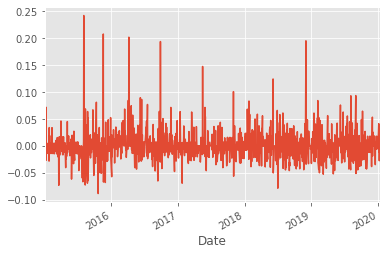

In [2]:
ret_saham = harga / harga.shift(1) - 1
ret_saham.tail()
ret_saham.plot(label='return')
plt.show()

C:\Users\radian\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\radian\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\radian\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'Normal QQ-plot dari Return Saham ANTM')

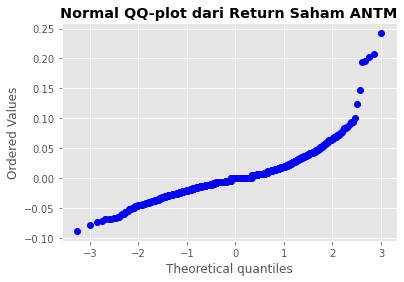

In [3]:
stats.probplot(ret_saham, dist=stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot dari Return Saham ANTM", weight="bold")

C:\Users\radian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\radian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


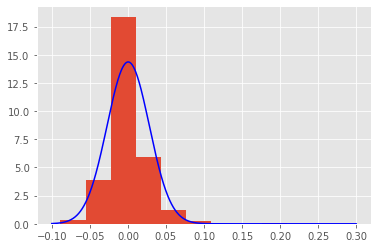

In [4]:
mean = np.mean(ret_saham)
std = np.std(ret_saham)

x = np.linspace(-.10,0.3,1000)
fitted_data = stats.distributions.norm.pdf(x, mean, std)
plt.hist(ret_saham, density=True)
plt.plot(x,fitted_data,'b-')


In [10]:
harga_akhir= harga.iloc[-1]
HistVAR = harga_akhir*np.percentile(ret_saham.dropna(), 1)
n_sims=100

In [11]:
for i in range (n_sims) :
    sim_returns =np.random.normal((mean/1000),(std/10),100)
    harga_akhir=harga_akhir*sim_returns+harga_akhir
    
    df4=pd.DataFrame(index=range(n_sims),data={'sim_returns':sim_returns,'harga_akhir':harga_akhir})

In [12]:
print(df4)

    sim_returns  harga_akhir
0     -0.003248   905.868777
1     -0.002956   851.244608
2     -0.001276   894.177808
3      0.000119   915.646512
4      0.001808   874.055416
..          ...          ...
95     0.000810   884.848806
96     0.002727   853.563649
97    -0.001757   939.538406
98    -0.002532   913.306188
99     0.001179   888.996944

[100 rows x 2 columns]


In [14]:
harga_prediksi=df4['harga_akhir']
delta_harga_prediksi=harga_prediksi - harga_prediksi.shift(1)
delta_harga_prediksi=delta_harga_prediksi.dropna()
delta_sort=np.sort(delta_harga_prediksi)[::-1]
VaR_delta_harga = np.percentile(delta_sort, 0.5)

return_prediksi=harga_prediksi /harga_prediksi.shift(1)-1
return_prediksi=return_prediksi.dropna()
return_prediksi_sort=np.sort(return_prediksi)[::-1]
VaR_return = np.percentile(return_prediksi_sort, 0.5)


print('---------------------------------------')
print('VaR perubahan harga hasil simulasi monte carlo ',VaR_delta_harga)
print('---------------------------------------')
print('VaR dari return hasil simulasi monte carlo ',VaR_return)
print()


---------------------------------------
VaR perubahan harga hasil simulasi monte carlo  -90.98802062679061
---------------------------------------
VaR dari return hasil simulasi monte carlo  -0.0974892838573735

